In [1]:
import importlib.resources as pkg_resources
from typing import Optional

import os
import numpy as np
import pandas as pd
import plotly.graph_objects as go

import deep_paint

In [2]:
def plot_logs(
    logs_df: pd.DataFrame,
    metric_col: str,
    renderer: str = "notebook",
    **kwargs
):
    """
    Plot logged metrics per epoch.
    
    Parameters
    ----------
    logs_df: pd.DataFrame,
        DataFrame with logged metrics per epoch.
    metric_col: str
        Name of column with logged metric values.
    renderer: str, default notebook
        Plotly renderer (ex. notebook, jupyterlab, vscode, iframe, etc).
    **kwargs
        Keyword arguments to pass to go.Figure().update_layout()
    """

    # Assumes metrics are logged per epoch
    if "epoch" not in logs_df.columns:
        logs_df["epoch"] = np.arange(101)
    fig = go.Figure()
    fig.add_trace(go.Scatter(
        x=logs_df["epoch"],
        y=logs_df[metric_col],
        mode='lines',
        line=dict(color="#67a9cf")
    ))
    
    # Update layout
    fig.update_layout(
        xaxis=dict(
            title='Epoch',
            title_standoff=25,
            tickmode="array",
            tickvals=[0, 20, 40, 60, 80, 100],
            minor=dict(
                tickmode="linear",
                tick0=0,
                dtick=10,
                gridcolor="#E6E6E6",
                gridwidth=1
            ),
            showgrid=True,
            gridcolor="#D3D3D3"
        ),
        autosize=False,
        margin=dict(
            l=50,
            r=50,
            b=100,
            t=100,
            pad=4
        ),
        font=dict(
            family="Arial, sans-serif",
            size=24,
            color="black"
        ),
        plot_bgcolor='white',
        showlegend=False,
        **kwargs
    )
    # Add border
    fig.add_shape(
        type="rect",
        xref="paper",
        yref="paper",
        x0=0,
        y0=0,
        x1=1,
        y1=1,
        line=dict(
            color="black",
            width=2
        )
    )
    fig.show(renderer=renderer)

## Binary Classifier

In [3]:
# Load csvs from tensorboard logs
binary_logs_path = pkg_resources.files(deep_paint).joinpath("..", "results", "logs").resolve()
binary_train_loss = pd.read_csv(os.path.join(binary_logs_path, "binary-train-loss.csv"))
binary_val_loss = pd.read_csv(os.path.join(binary_logs_path, "binary-val-loss.csv"))
binary_train_f1 = pd.read_csv(os.path.join(binary_logs_path, "binary-train-f1.csv"))
binary_val_f1 = pd.read_csv(os.path.join(binary_logs_path, "binary-val-f1.csv"))

In [4]:
# Change renderer according to your IDE
plot_logs(
    binary_train_loss,
    metric_col="Value",
    renderer="jupyterlab",
    width=1000,
    height=500,
    yaxis=dict(
        title="Cross Entropy Loss",
        title_standoff=25,
        range=[0, 1],
        showgrid=True,
        gridcolor="#D3D3D3"
    )
)

In [5]:
# Change renderer according to your IDE
plot_logs(
    binary_val_loss,
    metric_col="Value",
    renderer="jupyterlab",
    width=1000,
    height=500,
    yaxis=dict(
        title="Cross Entropy Loss",
        title_standoff=25,
        range=[0, 1],
        showgrid=True,
        gridcolor="#D3D3D3"
    )
)

In [6]:
# Change renderer according to your IDE
plot_logs(
    binary_train_f1,
    metric_col="Value",
    renderer="jupyterlab",
    width=1000,
    height=500,
    yaxis=dict(
        title="F1 Score",
        title_standoff=25,
        range=[0, 1],
        dtick=0.2,
        showgrid=True,
        gridcolor="#D3D3D3"
    )
)

In [7]:
# Change renderer according to your IDE
plot_logs(
    binary_val_f1,
    metric_col="Value",
    renderer="jupyterlab",
    width=1000,
    height=500,
    yaxis=dict(
        title="F1 Score",
        title_standoff=25,
        range=[0, 1],
        dtick=0.2,
        showgrid=True,
        gridcolor="#D3D3D3"
    )
)

## Multiclass Classifier

In [8]:
# Load csvs from tensorboard logs
multiclass_logs_path = pkg_resources.files(deep_paint).joinpath("..", "results", "logs").resolve()
multiclass_train_loss = pd.read_csv(os.path.join(multiclass_logs_path, "multiclass-train-loss.csv"))
multiclass_val_loss = pd.read_csv(os.path.join(multiclass_logs_path, "multiclass-val-loss.csv"))
multiclass_train_f1 = pd.read_csv(os.path.join(multiclass_logs_path, "multiclass-train-f1.csv"))
multiclass_val_f1 = pd.read_csv(os.path.join(multiclass_logs_path, "multiclass-val-f1.csv"))

In [9]:
# Change renderer according to your IDE
plot_logs(
    multiclass_train_loss,
    metric_col="Value",
    renderer="jupyterlab",
    width=1000,
    height=500,
    yaxis=dict(
        title="Cross Entropy Loss",
        title_standoff=25,
        range=[0, 1],
        showgrid=True,
        gridcolor="#D3D3D3"
    )
)

In [10]:
# Change renderer according to your IDE
plot_logs(
    multiclass_val_loss,
    metric_col="Value",
    renderer="jupyterlab",
    width=1000,
    height=500,
    yaxis=dict(
        title="Cross Entropy Loss",
        title_standoff=25,
        range=[0, 1],
        showgrid=True,
        gridcolor="#D3D3D3"
    )
)

In [11]:
# Change renderer according to your IDE
plot_logs(
    multiclass_train_f1,
    metric_col="Value",
    renderer="jupyterlab",
    width=1000,
    height=500,
    yaxis=dict(
        title="F1 Score",
        title_standoff=25,
        range=[0, 1],
        showgrid=True,
        gridcolor="#D3D3D3"
    )
)

In [12]:
# Change renderer according to your IDE
plot_logs(
    multiclass_val_f1,
    metric_col="Value",
    renderer="jupyterlab",
    width=1000,
    height=500,
    yaxis=dict(
        title="F1 Score",
        title_standoff=25,
        range=[0, 1],
        showgrid=True,
        gridcolor="#D3D3D3"
    )
)

In [13]:
def plot_metrics(
    metrics_df: pd.DataFrame,
    metric_col: str,
    x_col: str,
    chance_line: bool,
    renderer: str = "notebook",
    **kwargs
):
    """
    Plot logged metrics.
    
    Parameters
    ----------
    metrics_df: pd.DataFrame,
        DataFrame with logged metrics.
    metric_col: str
        Name of column with metrics.
    x_col: str
        Name of column to plot on x-axis.
    chance_line: bool
        Whether to display random chance line for baseline comparison.
    renderer: str, default notebook
        Plotly renderer (ex. notebook, jupyterlab, vscode, iframe, etc).
    **kwargs
        Keyword arguments to pass to go.Figure().update_layout()
    """

    fig = go.Figure()
    fig.add_trace(go.Scatter(
        x=metrics_df[x_col],
        y=metrics_df[metric_col],
        mode='lines+markers',
        line=dict(color="black"),
        marker=dict(size=10)
    ))
    if chance_line:
        # Add random chance baseline
        fig.add_trace(go.Scatter(
            x=[0, metrics_df[x_col].max()+5],
            y=[0.5, 0.5],
            mode='lines',
            name=f"Random chance",
            line=dict(color='gray', dash='dash')
        ))
    
    # Update layout
    fig.update_layout(
        autosize=False,
        margin=dict(
            l=50,
            r=50,
            b=100,
            t=100,
            pad=4
        ),
        font=dict(
            family="Arial, sans-serif",
            size=24,
            color="black"
        ),
        plot_bgcolor='white',
        showlegend=False,
        **kwargs
    )
    # Add border
    fig.add_shape(
        type="rect",
        xref="paper",
        yref="paper",
        x0=0,
        y0=0,
        x1=1,
        y1=1,
        line=dict(
            color="black",
            width=2
        )
    )
    fig.show(renderer=renderer)

## Binary Classifier (By Training Percent)

In [14]:
binary_logs_path = pkg_resources.files(deep_paint).joinpath("..", "results", "logs").resolve()
binary_percent_df = pd.read_csv(os.path.join(binary_logs_path, "binary-percent-f1.csv"))

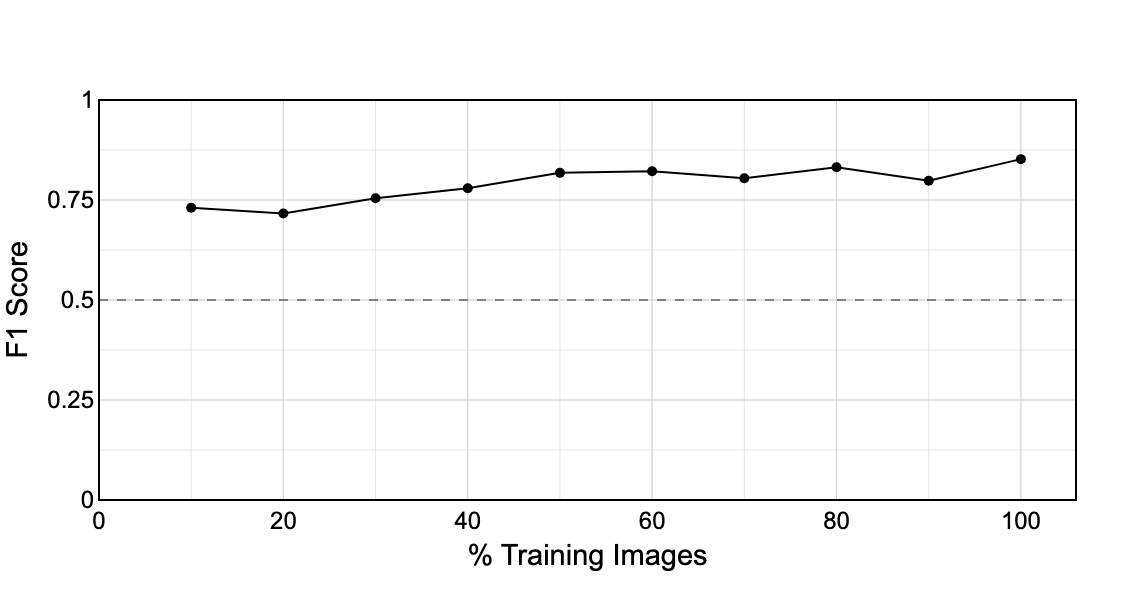

In [15]:
plot_metrics(
    binary_percent_df,
    metric_col="Test",
    x_col="Train Percent",
    chance_line=True,
    renderer="jupyterlab",
    width=500,
    height=600,
    xaxis=dict(
        title='% Training Images',
        title_standoff=15,
        tickmode="array",
        tickvals=[0, 20, 40, 60, 80, 100],
        minor=dict(
            tickmode="linear",
            tick0=0,
            dtick=10,
            gridcolor="#E6E6E6",
            gridwidth=1
        ),
        showgrid=True,
        gridcolor="#D3D3D3"
    ),
    yaxis=dict(
        title="F1 Score",
        title_standoff=15,
        range=[0, 1],
        tickmode="array",
        tickvals=[0, 0.25, 0.50, 0.75, 1.0],
        minor=dict(
            tickmode="linear",
            tick0=0,
            dtick=0.125,
            gridcolor="#E6E6E6",
            gridwidth=1
        ),
        showgrid=True,
        gridcolor="#D3D3D3"
    )
)